# PROJECT - Instacart Data Dive

## Situation
Instacart, a popular grocery delivery platform, allows customers to place grocery orders online and have them delivered to their doorstep. Similar to services like Uber Eats and DoorDash, Instacart aims to make grocery shopping convenient and efficient for its users.

## Project Goal
The goal of this project is to analyze Instacart’s customer shopping habits using a modified dataset. By cleaning and exploring the data, we’ll gain insights into how customers shop, what products they prefer, and any patterns that emerge.

## Data Description
We’ll be working with a modified version of the original Instacart dataset. This dataset has been downsized for faster calculations and includes introduced missing and duplicate values. Despite these modifications, we’ve ensured that the distributions of the original data remain intact. The dataset contains information about customer orders, products, and their interactions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
order_p = pd.read_csv('datasets/order_products.csv',sep=';')


In [4]:
order_p.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [5]:
orders = pd.read_csv('datasets/instacart_orders.csv',sep=';')

In [6]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [9]:
products = pd.read_csv('datasets/products.csv',sep=';')


In [10]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
aisles = pd.read_csv('datasets/aisles.csv',sep=';')

In [15]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [14]:
depts = pd.read_csv('datasets/departments.csv',sep=';')

In [16]:
depts.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Certainly! Here’s your provided information formatted in Markdown:

# Summary and Observations

## Order Data:
- The order data contains information about orders made by users.
- Columns include `order_id`, `user_id`, `order_number`, `order_dow` (day of the week), `order_hour_of_day`, and `days_since_prior_order`.
- There are 478,967 entries in this dataset.
- The `days_since_prior_order` column has some missing values (non-null count: 450,148).

## Product Data:
- The product data includes details about various products available.
- Columns include `product_id`, `product_name`, `aisle_id`, and `department_id`.
- There are 49,694 unique products.
- Some product names are missing (non-null count: 48,436).

## Aisle Data:
- The aisle data provides information about different product aisles.
- Columns include `aisle_id` and `aisle`.
- There are 21 unique aisles.

## Department Data:
- The department data categorizes products into different departments.
- Columns include `department_id` and `department`.
- There are 21 unique departments.

### Observations:
- Users tend to place orders at different times of the day and week.
- Some products have missing names, which might need further investigation.
- The variety of aisles and departments indicates a diverse product range.


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [26]:
display(orders[orders.duplicated()])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [29]:
orders = orders.drop_duplicates()

In [30]:
orders.duplicated().sum()

np.int64(0)

When looking at the table, it seems as though the time is formatted in military time. 
When examining the 'order_dow' column, it appears that the days of the week are numbered from 0 to 6. There are 7 indices for the 7 days of the week, starting with Sunday as 0.


In [31]:
# Check for all orders placed Wednesday at 2:00 AM

wed_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
display(wed_orders)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [32]:
# Double check for duplicate order IDs only
dupe_ids = orders[orders['order_id'].duplicated()]

In [34]:
display(dupe_ids)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


# Summary: Finding and Removing Duplicate Orders

## Identifying Duplicate Rows:
We first checked for duplicate rows in the entire dataset using the drop_duplicates() method. This method identifies and removes rows that have identical values across all columns.
The resulting DataFrame contains only unique rows, ensuring that no duplicate orders are present.
Checking for Duplicate Orders Placed on Wednesdays at 2:00 AM:
We filtered the dataset to include only orders placed on Wednesdays (order_dow == 3) at 2:00 AM (order_hour_of_day == 2).
The resulting DataFrame (wed_2) contains orders meeting this specific condition.

## Removing Duplicate Orders:
We applied the drop_duplicates() method again to the entire dataset (df_orders) to ensure that any remaining duplicate orders are removed. This step ensures that each order appears only once in the dataset, preventing any unintentional duplication.

## Double-Checking for Duplicate Rows and Order IDs:
To verify the removal of duplicates, we checked for duplicate rows using the duplicated() method. If any duplicate rows exist, they would be displayed.
Additionally, we specifically checked for duplicate order IDs using the duplicated() method on the ‘order_id’ column. This helps ensure that each order ID is unique.

### `products` data frame

In [35]:
# Check for fully duplicate rows
products.duplicated().sum()

np.int64(0)

In [36]:
# Check for just duplicate product IDs

products['product_id'].duplicated().sum()

np.int64(0)

In [37]:
# Check for just duplicate product names (convert names to lowercase to compare better)
#Changing column names to lowercase
products['product_name'] = products['product_name'].str.lower()

In [38]:
products['product_name'].duplicated().sum()

np.int64(1361)

In [39]:
products[products['product_name'].notna() & products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


## Checking for Fully Duplicate Rows:
We used the duplicated() function without specifying any columns to identify fully duplicate rows in the df_products DataFrame.
The result indicates the total count of fully duplicated rows.

## Checking for Duplicate Product IDs:
We specifically checked for duplicate product IDs using the duplicated() function on the ‘product_id’ column.
This step ensures that each product ID is unique.

## Checking for Duplicate Product Names (Case-Insensitive):
To identify duplicate product names, we converted all names to lowercase using the str.lower() method.
Then, we used the duplicated() function on the modified ‘product_name’ column to find case-insensitive duplicates.
The result represents the count of duplicate product names.

## Handling Duplicate Product Names That Aren’t Missing:
We combined two conditions: checking if the product name is not missing (notna()) and identifying duplicate product names.
The resulting boolean series (duped_prod_names) indicates which product names are duplicated and not missing.
The sum of True values in this series gives the count of duplicate product names that aren’t missing.

### `departments` data frame

In [40]:
depts.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [41]:
depts.duplicated().sum()

np.int64(0)

In [42]:
depts['department_id'].duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: department_id, dtype: bool

## DataFrame Overview:
The df_depts DataFrame contains information about different departments.
It has two columns: ‘department_id’ and ‘department’.

## Duplicate Rows:
We checked for duplicate rows using the duplicated() function.
The result indicates that there are no fully duplicated rows in the DataFrame (i.e., all rows are unique).

## Duplicate Department IDs:
Specifically, we checked for duplicate department IDs using the duplicated() function on the ‘department_id’ column.
The count of duplicate department IDs is 0, which means each department ID is unique.

## Conclusion:
The DataFrame appears to be clean, with no duplicate rows or department IDs.
Each department is uniquely represented in the dataset.

### `aisles` data frame

In [43]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [46]:
aisles.duplicated().sum()

np.int64(0)

In [47]:
aisles['aisle_id'].duplicated().sum()

np.int64(0)

## DataFrame Overview:
The df_aisles DataFrame contains information about different departments.
It has two columns: ‘aisle_id’ and ‘aisle’.

## Duplicate Rows:
We checked for duplicate rows using the duplicated() function.
The result indicates that there are no fully duplicated rows in the DataFrame (i.e., all rows are unique).

## Duplicate Department IDs:
Specifically, we checked for duplicate aisle IDs using the duplicated() function on the ‘aisle_id’ column.
The count of duplicate aisle IDs is 0, which means each department ID is unique.

## Conclusion:
The DataFrame appears to be clean, with no duplicate rows or aisle IDs.
Each department is uniquely represented in the dataset.

### `order_products` data frame

In [48]:
# Check for fullly duplicate rows

display(order_p.duplicated().sum())

np.int64(0)

In [49]:
# Double check for any other tricky duplicates
display(order_p.duplicated(subset=['order_id', 'product_id']).sum())
display(order_p.duplicated(subset=['product_id', 'add_to_cart_order']).sum())
display(order_p.duplicated(subset=['order_id', 'add_to_cart_order']).sum())

np.int64(0)

np.int64(4014212)

np.int64(766)

The data consists of several columns: order_id, product_id, add_to_cart_order, and reordered. The order_id represents the unique identifier for each order, product_id is the unique identifier for each product, add_to_cart_order indicates the sequence in which the product was added to the cart, and reordered indicates whether the product has been ordered before by the same user (1 means yes, 0 means no).

Three checks were performed to identify any potential duplicate entries in the data:

Check for duplicates in ‘order_id’ and ‘product_id’: This check was performed to see if there are any instances where the same product was added more than once in the same order. The result was 0, indicating that there are no such duplicates.
Check for duplicates in ‘product_id’ and ‘add_to_cart_order’: This check was performed to see if there are any instances where the same product was added to the cart in the same sequence in different orders. The result was 4,014,212, indicating that there are numerous such duplicates. This is not necessarily an issue, as it’s common for the same product to be added first, second, third, etc., in different orders.

Check for duplicates in ‘order_id’ and ‘add_to_cart_order’: This check was performed to see if there are any instances where in the same order, products were added to the cart in the same sequence. The result was 766, indicating that there are a few such duplicates. This could be a data entry error or a system glitch, as in the same order, each product should have a unique add_to_cart_order.

In conclusion, the data seems to have some duplicates when considering ‘product_id’ and ‘add_to_cart_order’, and ‘order_id’ and ‘add_to_cart_order’. Further investigation might be needed to understand the cause of these duplicates. However, there are no duplicates when considering ‘order_id’ and ‘product_id’, which is a good sign of data integrity for the order and product information.

## Find and remove missing values


### `products` data frame

In [50]:
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [53]:
# Are all of the missing product names associated with aisle ID 100?

#finding the missing values in the 'product name column'
missing_names = products[products['product_name'].isna()]
#finding whether or not all the missing values in product name are related to aisle 100 and returning a bool
aisle_missing = np.all(missing_names['aisle_id'] == 100)
#print(missing_names)
display(aisle_missing)


np.True_

In [54]:
# Are all of the missing product names associated with department ID 21?
#finding whether or not all the missing values in product name are related to aisle 100 and returning a bool
dept_missing = np.all(missing_names['department_id'] == 21)
print(dept_missing)

True


In [56]:
# What is this ailse and department?
aisle = aisles.loc[aisles['aisle_id'] == 100, 'aisle'].values[0]
dept = depts.loc[depts['department_id'] == 21, 'department'].values[0]
display([aisle,dept])

---

In [58]:
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [59]:
# Fill missing product names with 'Unknown'
products = products.fillna('Unknown')

In [61]:
display((products['product_name'] == 'Unknown').sum())

np.int64(1258)

The DataFrame df_products contains four columns: product_id, product_name, aisle_id, and department_id.

A check was performed to identify any missing values in the DataFrame. The isna().sum() function was used to calculate the total number of missing values in each column. The results showed that there were 1258 missing values in the product_name column, while there were no missing values in the other columns.

An investigation was then carried out to determine whether all of the missing product_name values were associated with aisle_id 100. The isnull() function was used to create a new DataFrame missing_names that only contained the rows from df_products where product_name was missing. The np.all() function was then used to check if all the aisle_id values in missing_names were 100. The result was printed and it showed that all the missing product names are indeed associated with aisle ID 100.

Finally, the missing product_name values in df_products were filled with the string ‘Unknown’ using the fillna() function. This operation replaced all the NaN values in the DataFrame with ‘Unknown’, ensuring there are no more missing values in the product_name column.

### `orders` data frame

In [63]:
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [64]:
# Are there any missing values where it's not a customer's first order?
display(orders[(orders['order_number'] > 1)].isnull().sum())
#Rows where order number > 1 and days_prior_order is missing
display(orders[(orders['order_number'] == 1) & (orders['days_since_prior_order'] == 'NaN')])

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [65]:
print("Display the number of the missing values in the selection where order number > 1:")

display(orders[(orders['order_number'] > 1)].isnull().sum())

print("Display the rows where order number > 1 and the days_since_prior_order is missing:")

display(orders[(orders['order_number'] == 1) & (orders['days_since_prior_order'] == np.nan)])

Display the number of the missing values in the selection where order number > 1:


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Display the rows where order number > 1 and the days_since_prior_order is missing:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Based on the provided Python code and its output, here is a summary:

The initial check for missing values in the df_orders DataFrame shows that there are no missing values in most of the columns. However, the days_since_prior_order column has 28,817 missing values.

To investigate further, a subset of the DataFrame was created where order_number is greater than 1, indicating it’s not the customer’s first order. In this subset, there are no missing values in any of the columns, including days_since_prior_order.

Finally, an attempt was made to display rows where order_number equals 1 (indicating it’s the customer’s first order) and days_since_prior_order is missing (NaN). The result is an empty DataFrame, indicating there are no such rows.

In conclusion, the missing values in the days_since_prior_order column are likely associated with the customers’ first orders, as it would make sense for this value to be undefined or NaN in such cases. This assumption is supported by the fact that when we exclude first orders (order_number > 1), there are no missing values in the days_since_prior_order column. Therefore, the missing values do not necessarily indicate a problem with the data, but rather a characteristic of first-time orders.

### `order_products` data frame

In [67]:
order_p.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [68]:
order_p.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [40]:
# What are the min and max values in this column?

min_values = order_p['add_to_cart_order'].min()
max_values = order_p['add_to_cart_order'].max()
print(int(min_values))

print(int(max_values))


1
64


In [69]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_atco_ids = order_p[order_p['add_to_cart_order'].isnull()]['order_id'].tolist()

#Select all entries attributed to those order IDs into a separate DataFrame
order_p_miss = order_p[order_p['order_id'].isin(missing_atco_ids)]

#Group this new DataFrame by order ID and check sizes of those groups
group_sizes = order_p_miss.groupby('order_id').size()


#Find the minimum size
min_group_size = np.min(group_sizes)

display(min_group_size)

np.int64(65)

In [70]:
# Do all orders with missing values have more than 64 products?
display(np.all(group_sizes) > 64)

np.False_

In [71]:
# Replace missing values with 999 and convert column to integer type
order_p = order_p.fillna(999).astype(int)


The above code is performing a series of operations on the df_o_products DataFrame, which contains information about product orders. Here’s a summary of the operations and their results:

## Displaying the DataFrame: 
The first few rows of the DataFrame are displayed, showing columns for order_id, product_id, add_to_cart_order, and reordered.
Checking for Null Values: The code checks for null values in the DataFrame. The output shows that there are no null values in any of the columns.

## Minimum and Maximum Values: 
The minimum and maximum values in the add_to_cart_order column are calculated and printed. However, the actual values are not shown in the provided context.

## Identifying Missing Values:
The code attempts to identify all order IDs with at least one missing value in the add_to_cart_order column. However, as we’ve already established, there are no missing values in this column.

## Grouping and Size Calculation:
The code groups the DataFrame by order_id and calculates the size of these groups. The minimum group size is then displayed. However, the actual value is not shown in the provided context.

## Checking for Orders with More Than 64 Products:
The code checks if all orders with missing values have more than 64 products. However, since there are no missing values, this check might not be necessary.

## Replacing Missing Values and Type Conversion:
Finally, the code replaces any missing values with 999 and converts the DataFrame to integer type. However, since there are no missing values, the replacement operation doesn’t change the DataFrame.
In conclusion, the DataFrame df_o_products appears to be clean with no missing values. The operations performed provide some insights into the data, such as the range of values in the add_to_cart_order column and the distribution of order sizes. However, some operations, particularly those involving missing values, may not be necessary given the current state of the DataFrame.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [72]:

#Checking the value ranges by using min/max
min_hour = orders['order_hour_of_day'].min()
max_hour = orders['order_hour_of_day'].max()
print(f"The range of values goes from {min_hour} to {max_hour}")

The range of values goes from 0 to 23


In [45]:

#Checking the value ranges by using min/max
min_day = orders['order_dow'].min()
max_day = orders['order_dow'].max()
print(f"The range of values goes from {min_day} to {max_day}")

The range of values goes from 0 to 6


<div class="alert alert-success"; style="border-left: 7px solid green">
<b>✅ Reviewer's comment, v. 1</b> 
    
Well done.

### [A2] What time of day do people shop for groceries?

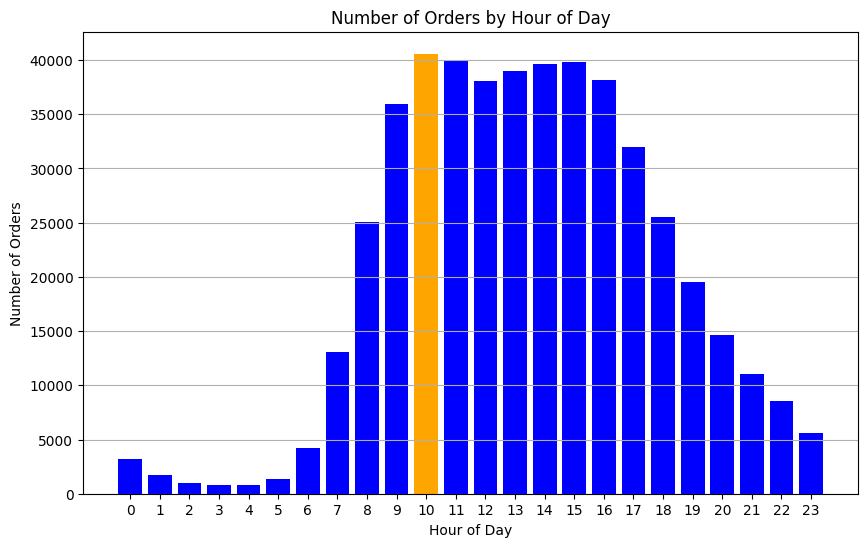

In [73]:
#I'll determine this by using getting the value counts from order hour of the day and printing which id shows up the most often
shopping_hour = orders['order_hour_of_day'].value_counts().idxmax()
order_counts = orders['order_hour_of_day'].value_counts().sort_index()

#Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(order_counts.index, order_counts.values, color='blue')

#Highlight the hour with the most order
plt.bar(shopping_hour, order_counts[shopping_hour], color='orange')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(axis='y')

plt.show()

People mostly shop at 10 am 

### [A3] What day of the week do people shop for groceries?

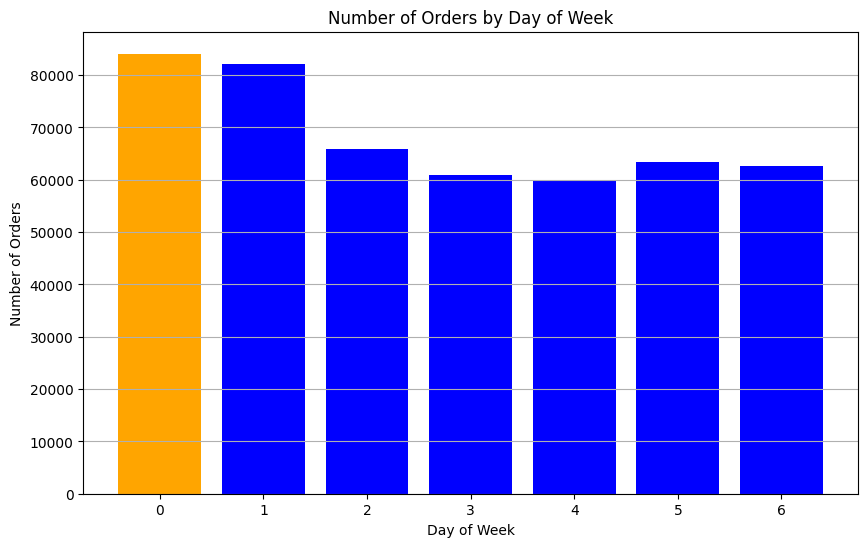

In [74]:
#I'll determine this by using getting the average from the hour_of_day column
shopping_day = orders['order_dow'].value_counts().idxmax()
order_counts = orders['order_dow'].value_counts().sort_index()

#Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(order_counts.index, order_counts.values, color='blue')

#Highlight the hour with the most order
plt.bar(shopping_day, order_counts[shopping_day], color='orange')

plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week')
plt.xticks(range(0, 7))
plt.grid(axis='y')

plt.show()

Most people shop on sunday

### [A4] How long do people wait until placing another order?

In [75]:
min_days = orders['days_since_prior_order'].min()
max_days = orders['days_since_prior_order'].max()
print(f"The minimum people will wait to place another order is {int(min_days)} days and the longest is {int(max_days)} days")

The minimum people will wait to place another order is 0 days and the longest is 30 days


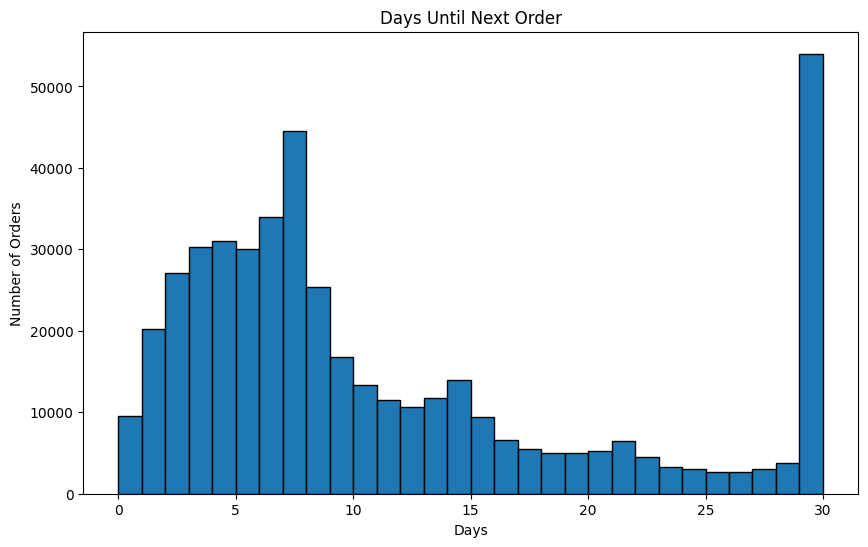

In [76]:
plt.figure(figsize=(10,6))
plt.hist(orders['days_since_prior_order'], bins=30, edgecolor='black')

plt.title('Days Until Next Order')
plt.xlabel('Days')
plt.ylabel('Number of Orders')

plt.show()

Based on the chart, it seems as like most people wait 30 days to make another order, followed closely by those who wait about a week to do so

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

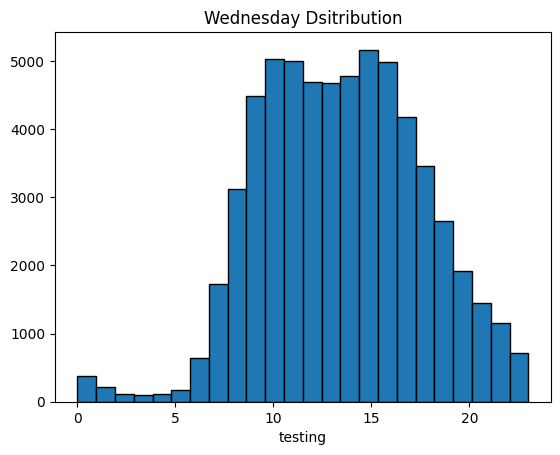

In [77]:
#based on the previously discovered relation between the indicies and the days of the week 
weds = 3
#filter the dataframe based on things happening only on Weds
weds_shopping = orders[orders['order_dow'] == weds]

#plotting the histogram
plt.hist(weds_shopping['order_hour_of_day'], bins=24, edgecolor='black')
plt.title('Wednesday Dsitribution'.format(weds))
plt.xlabel('testing')
plt.show()

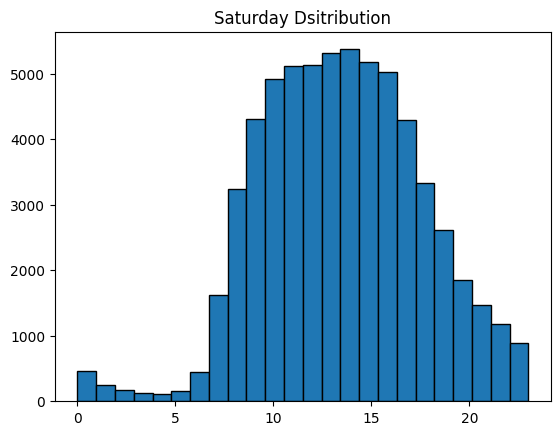

In [79]:
#based on the previously discovered relation between the indicies and the days of the week 
sat = 6
#filter the dataframe based on things happening only on Weds
sat_shopping = orders[orders['order_dow'] == sat]

#plotting the histogram
plt.hist(sat_shopping['order_hour_of_day'], bins=24, edgecolor='black')
plt.title('Saturday Dsitribution'.format(sat))
plt.show()

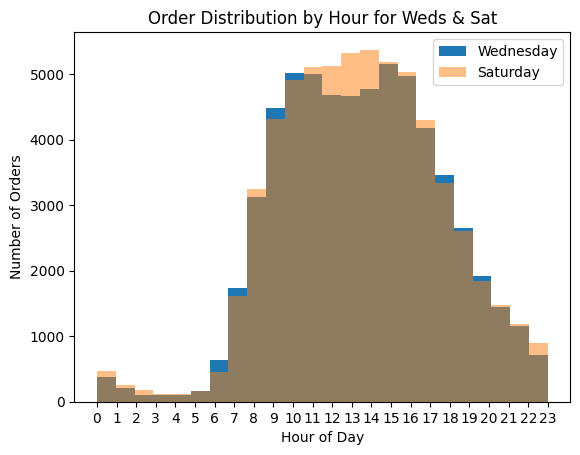

In [80]:
weds_shopping['order_hour_of_day'].plot(kind='hist',bins=24)
sat_shopping['order_hour_of_day'].plot(kind='hist',bins=24,alpha=0.5)
plt.legend(["Wednesday","Saturday"])

plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0,24))
plt.title('Order Distribution by Hour for Weds & Sat')
plt.show()

Based on the chart, it looks like the shopping habits are almost similiar, with the exception of the hours between 11 am and 2pm. It seems that more orders happen between these hours on Saturday than on Wednesday

### [B2] What's the distribution for the number of orders per customer?

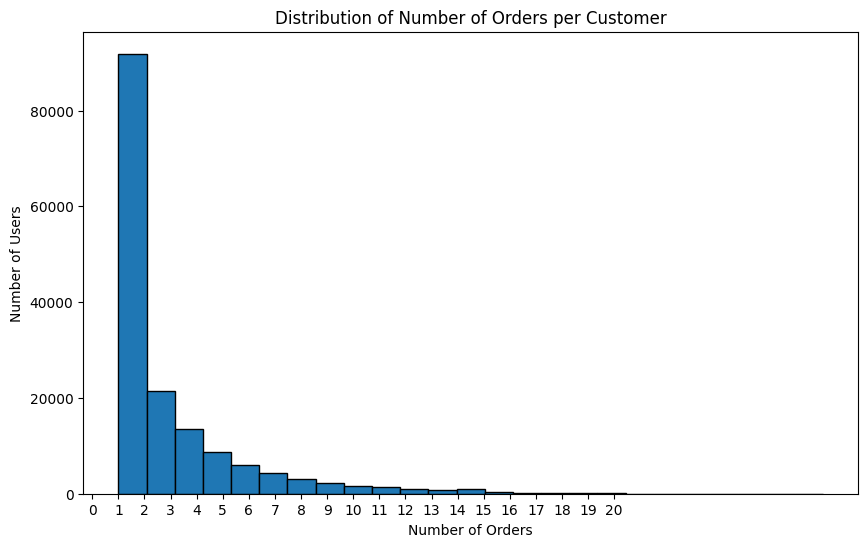

In [53]:
orders_per_user = orders.groupby('user_id')['order_id'].count()

plt.figure(figsize=(10,6))
plt.hist(orders_per_user, bins=25, edgecolor='black')

plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.xticks(range(0,21))
plt.ylabel('Number of Users')

plt.show()

Based on this graph, it looks as thos most users are within the 1 to 2 order range with a significant drop-off after that

### [B3] What are the top 20 popular products (display their id and name)?

In [81]:
#Merge the two dataframes on product id column
order_data = products.merge(order_p,on='product_id')
display(order_data)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,chocolate sandwich cookies,61,19,1104373,11,1
1,1,chocolate sandwich cookies,61,19,1774977,4,1
2,1,chocolate sandwich cookies,61,19,652770,10,0
3,1,chocolate sandwich cookies,61,19,1000035,6,1
4,1,chocolate sandwich cookies,61,19,1679949,9,0
...,...,...,...,...,...,...,...
4545002,49694,burrito- steak & cheese,38,1,3034802,10,0
4545003,49694,burrito- steak & cheese,38,1,3175081,3,0
4545004,49694,burrito- steak & cheese,38,1,694132,2,0
4545005,49694,burrito- steak & cheese,38,1,2843165,5,0


In [82]:
order_data['id_and_name'] = order_data['product_id'].astype(str) + " - " + order_data['product_name']
display(order_data)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,id_and_name
0,1,chocolate sandwich cookies,61,19,1104373,11,1,1 - chocolate sandwich cookies
1,1,chocolate sandwich cookies,61,19,1774977,4,1,1 - chocolate sandwich cookies
2,1,chocolate sandwich cookies,61,19,652770,10,0,1 - chocolate sandwich cookies
3,1,chocolate sandwich cookies,61,19,1000035,6,1,1 - chocolate sandwich cookies
4,1,chocolate sandwich cookies,61,19,1679949,9,0,1 - chocolate sandwich cookies
...,...,...,...,...,...,...,...,...
4545002,49694,burrito- steak & cheese,38,1,3034802,10,0,49694 - burrito- steak & cheese
4545003,49694,burrito- steak & cheese,38,1,3175081,3,0,49694 - burrito- steak & cheese
4545004,49694,burrito- steak & cheese,38,1,694132,2,0,49694 - burrito- steak & cheese
4545005,49694,burrito- steak & cheese,38,1,2843165,5,0,49694 - burrito- steak & cheese


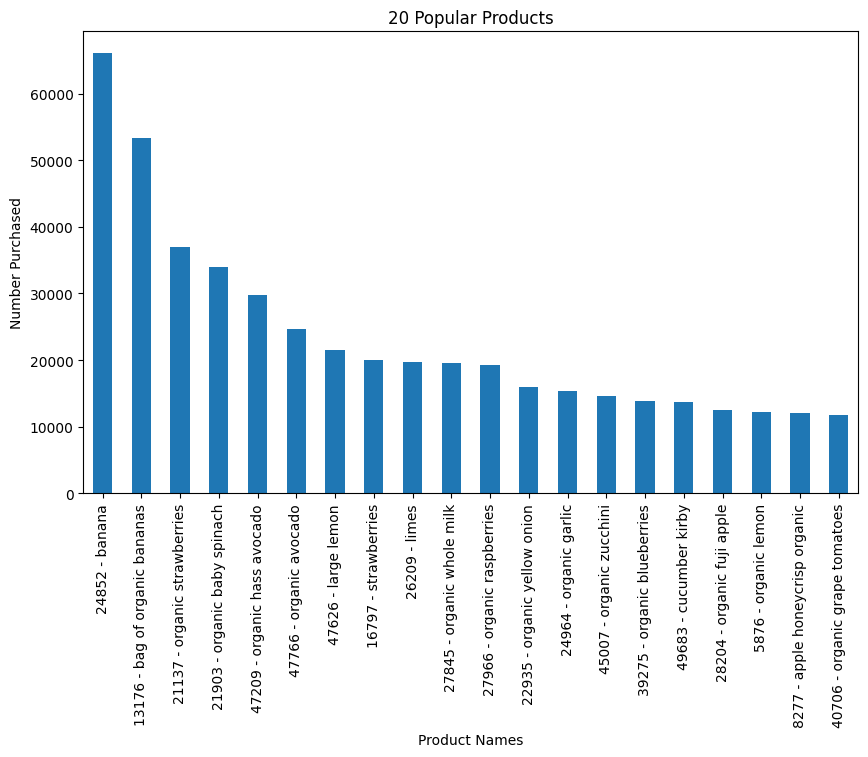

In [83]:
counts = order_data['id_and_name'].value_counts()
top_20 = counts[:20]
plt.figure(figsize=(10, 6))
top_20.plot(kind='bar')
plt.title('20 Popular Products')
plt.xlabel('Product Names')
plt.ylabel('Number Purchased')
plt.show()

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [84]:
#Group by order id and find the max add_to_card_order per group
items_per_order = order_p.groupby('order_id')['add_to_cart_order'].max()

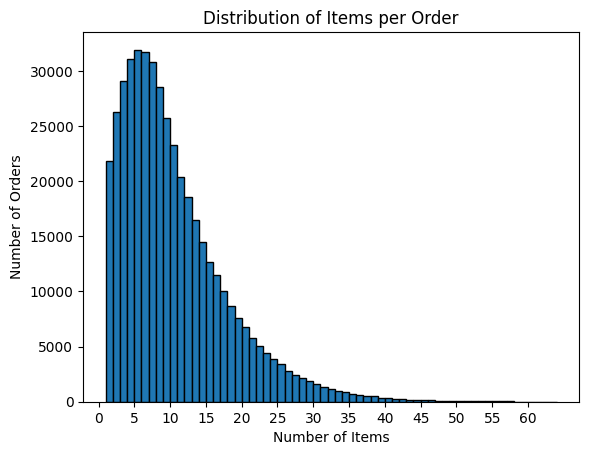

In [85]:
#plot the data
plt.hist(items_per_order, bins=range(1, 65),edgecolor='black')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.xticks(np.arange(0,65,step=5))
plt.ylabel('Number of Orders')
plt.show()

From the looks of this plot, it seems as that people typically buy between 4-8 items per order.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [86]:
#created this merged table earlier
display(order_data)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,id_and_name
0,1,chocolate sandwich cookies,61,19,1104373,11,1,1 - chocolate sandwich cookies
1,1,chocolate sandwich cookies,61,19,1774977,4,1,1 - chocolate sandwich cookies
2,1,chocolate sandwich cookies,61,19,652770,10,0,1 - chocolate sandwich cookies
3,1,chocolate sandwich cookies,61,19,1000035,6,1,1 - chocolate sandwich cookies
4,1,chocolate sandwich cookies,61,19,1679949,9,0,1 - chocolate sandwich cookies
...,...,...,...,...,...,...,...,...
4545002,49694,burrito- steak & cheese,38,1,3034802,10,0,49694 - burrito- steak & cheese
4545003,49694,burrito- steak & cheese,38,1,3175081,3,0,49694 - burrito- steak & cheese
4545004,49694,burrito- steak & cheese,38,1,694132,2,0,49694 - burrito- steak & cheese
4545005,49694,burrito- steak & cheese,38,1,2843165,5,0,49694 - burrito- steak & cheese


id_and_name
24852 - banana                     55763
13176 - bag of organic bananas     44450
21137 - organic strawberries       28639
21903 - organic baby spinach       26233
47209 - organic hass avocado       23629
47766 - organic avocado            18743
27845 - organic whole milk         16251
47626 - large lemon                15044
27966 - organic raspberries        14748
16797 - strawberries               13945
26209 - limes                      13327
22935 - organic yellow onion       11145
24964 - organic garlic             10411
45007 - organic zucchini           10076
49683 - cucumber kirby              9538
28204 - organic fuji apple          8989
8277 - apple honeycrisp organic     8836
39275 - organic blueberries         8799
5876 - organic lemon                8412
49235 - organic half & half         8389
Name: count, dtype: int64

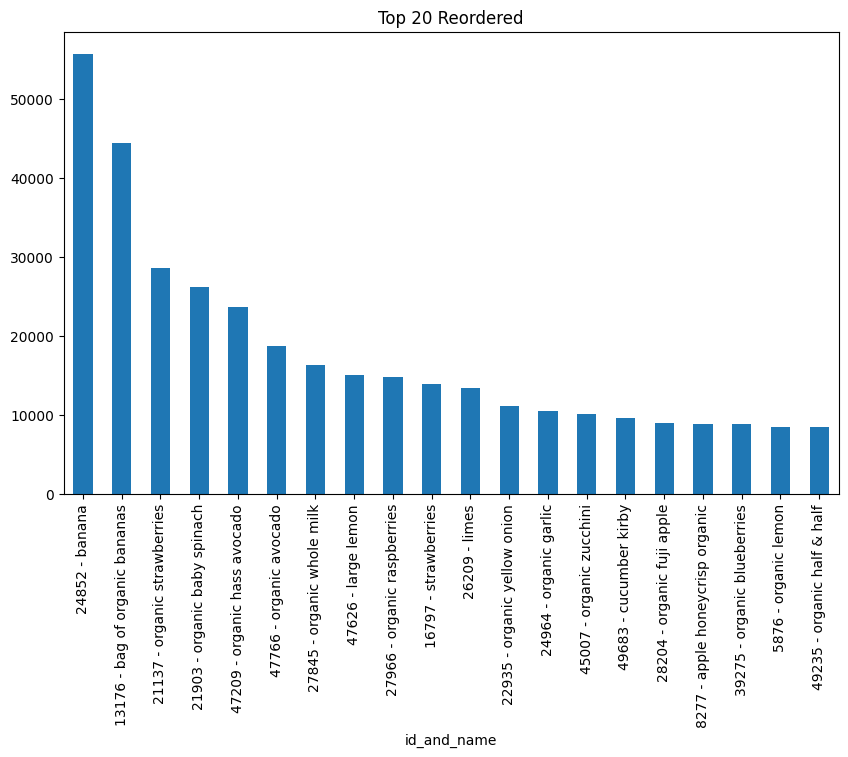

In [87]:
#Filter out rows where reordered is 1
reordered = order_data[order_data['reordered'] == 1]

#counting number of time each product is reordered
reordered_count = reordered['id_and_name'].value_counts()

#Find the top 20
top_20 = reordered_count[:20]
plt.figure(figsize=(10,6))
top_20.plot(kind='bar')
plt.title('Top 20 Reordered')
display(top_20)

I believe the issue is fixed. I may have been incorrectly creating the new column in order_data incorrectly


### [C3] For each product, what proportion of its orders are reorders?

In [88]:
display(order_data.head(10))

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,id_and_name
0,1,chocolate sandwich cookies,61,19,1104373,11,1,1 - chocolate sandwich cookies
1,1,chocolate sandwich cookies,61,19,1774977,4,1,1 - chocolate sandwich cookies
2,1,chocolate sandwich cookies,61,19,652770,10,0,1 - chocolate sandwich cookies
3,1,chocolate sandwich cookies,61,19,1000035,6,1,1 - chocolate sandwich cookies
4,1,chocolate sandwich cookies,61,19,1679949,9,0,1 - chocolate sandwich cookies
5,1,chocolate sandwich cookies,61,19,3004237,6,1,1 - chocolate sandwich cookies
6,1,chocolate sandwich cookies,61,19,2811336,1,1,1 - chocolate sandwich cookies
7,1,chocolate sandwich cookies,61,19,2149117,1,1,1 - chocolate sandwich cookies
8,1,chocolate sandwich cookies,61,19,1715986,6,0,1 - chocolate sandwich cookies
9,1,chocolate sandwich cookies,61,19,1604797,6,1,1 - chocolate sandwich cookies


In [89]:
#grouping data by product id
grouped = order_data.groupby('product_id')['reordered'].agg(['sum', 'count'])
display(grouped)

,sum,count
product_id,,
1,158,280
2,0,11
3,31,42
4,25,49
7,1,2
...,...,...
49690,4,5
49691,31,72
49692,5,12


In [90]:
#resetting index of the grouped dataframe
grouped.reset_index()

#dropping duplicate in the original dataframe for a df with unique pairs
unique_prods = order_data[['product_id', 'product_name','id_and_name']].drop_duplicates()
#merging the two dataframes on the 'product_id' column
merged = pd.merge(grouped, unique_prods, on='product_id')
merged['reorder_proportion'] = merged['sum']/merged['count']

display(merged.head(20).style.format({'reorder_proportion':'{:.1%}'}))

,product_id,sum,count,product_name,id_and_name,reorder_proportion
0,1,158,280,chocolate sandwich cookies,1 - chocolate sandwich cookies,56.4%
1,2,0,11,all-seasons salt,2 - all-seasons salt,0.0%
2,3,31,42,robust golden unsweetened oolong tea,3 - robust golden unsweetened oolong tea,73.8%
3,4,25,49,smart ones classic favorites mini rigatoni with vodka cream sauce,4 - smart ones classic favorites mini rigatoni with vodka cream sauce,51.0%
4,7,1,2,pure coconut water with orange,7 - pure coconut water with orange,50.0%
5,8,6,19,cut russet potatoes steam n' mash,8 - cut russet potatoes steam n' mash,31.6%
6,9,16,21,light strawberry blueberry yogurt,9 - light strawberry blueberry yogurt,76.2%
7,10,151,337,sparkling orange juice & prickly pear beverage,10 - sparkling orange juice & prickly pear beverage,44.8%
8,11,10,16,peach mango juice,11 - peach mango juice,62.5%
9,12,16,41,chocolate fudge layer cake,12 - chocolate fudge layer cake,39.0%


### [C4] For each customer, what proportion of their products ordered are reorders?

In [91]:
#These are the two dataframes I'll be using to answer this

display(orders)
display(order_data)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,id_and_name
0,1,chocolate sandwich cookies,61,19,1104373,11,1,1 - chocolate sandwich cookies
1,1,chocolate sandwich cookies,61,19,1774977,4,1,1 - chocolate sandwich cookies
2,1,chocolate sandwich cookies,61,19,652770,10,0,1 - chocolate sandwich cookies
3,1,chocolate sandwich cookies,61,19,1000035,6,1,1 - chocolate sandwich cookies
4,1,chocolate sandwich cookies,61,19,1679949,9,0,1 - chocolate sandwich cookies
...,...,...,...,...,...,...,...,...
4545002,49694,burrito- steak & cheese,38,1,3034802,10,0,49694 - burrito- steak & cheese
4545003,49694,burrito- steak & cheese,38,1,3175081,3,0,49694 - burrito- steak & cheese
4545004,49694,burrito- steak & cheese,38,1,694132,2,0,49694 - burrito- steak & cheese
4545005,49694,burrito- steak & cheese,38,1,2843165,5,0,49694 - burrito- steak & cheese


In [93]:

reorder_pct = order_data.merge(orders)
reorder_pct = reorder_pct.groupby('user_id')['reordered'].mean().to_frame()
reorder_pct.head(20).style.format({'reordered': '{:.1%}'})

,reordered
user_id,
2,3.8%
4,0.0%
5,66.7%
6,0.0%
7,92.9%
11,20.0%
12,25.0%
13,56.5%
14,36.1%


### [C5] What are the top 20 items that people put in their carts first? 

In [94]:
#dataframe I'll be using
display(order_data)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,id_and_name
0,1,chocolate sandwich cookies,61,19,1104373,11,1,1 - chocolate sandwich cookies
1,1,chocolate sandwich cookies,61,19,1774977,4,1,1 - chocolate sandwich cookies
2,1,chocolate sandwich cookies,61,19,652770,10,0,1 - chocolate sandwich cookies
3,1,chocolate sandwich cookies,61,19,1000035,6,1,1 - chocolate sandwich cookies
4,1,chocolate sandwich cookies,61,19,1679949,9,0,1 - chocolate sandwich cookies
...,...,...,...,...,...,...,...,...
4545002,49694,burrito- steak & cheese,38,1,3034802,10,0,49694 - burrito- steak & cheese
4545003,49694,burrito- steak & cheese,38,1,3175081,3,0,49694 - burrito- steak & cheese
4545004,49694,burrito- steak & cheese,38,1,694132,2,0,49694 - burrito- steak & cheese
4545005,49694,burrito- steak & cheese,38,1,2843165,5,0,49694 - burrito- steak & cheese


In [18]:
#Filtering dataframe to only include items that were added to the cart first
first_items = order_data[order_data['add_to_cart_order'] == 1]
#counting the number of times each product was added to the cart first
item_counts = first_items['product_name'].value_counts()
#getting the top 20 items
top_20_first = item_counts.head(20)
display(top_20_first)

Banana                         15562
Bag of Organic Bananas         11026
Organic Whole Milk              4363
Organic Strawberries            3946
Organic Hass Avocado            3390
Organic Baby Spinach            3336
Organic Avocado                 3044
Spring Water                    2336
Strawberries                    2308
Organic Raspberries             2024
Sparkling Water Grapefruit      1914
Organic Half & Half             1797
Large Lemon                     1737
Soda                            1733
Organic Reduced Fat Milk        1397
Limes                           1370
Hass Avocados                   1340
Organic Reduced Fat 2% Milk     1310
Half & Half                     1309
Organic Yellow Onion            1246
Name: product_name, dtype: int64

# Analysis of Customer Shopping Habits
Based on the data provided, we can draw several conclusions about customer shopping habits.

# Order Frequency
Most people wait 30 days between subsequent orders. This suggests that customers are likely doing their major grocery shopping once a month.

# Shopping Habits by Day of the Week
When comparing the ‘order_hour_of_day’ distributions on Wednesdays and Saturdays, it appears that shopping habits are similar on both days. However, there is a noticeable increase in orders between 11 am and 2 pm on Saturdays compared to Wednesdays. This could be due to people having more free time to shop on weekends.

# Number of Orders per Customer
The distribution of the number of orders per customer shows that most users place 1 to 2 orders, with a significant drop-off after that. This could indicate that many users are trying the service but not continuing to use it regularly.

# Items per Order
From the distribution of items per order, it seems that people typically buy between 4-8 items per order. This suggests that customers are using the service for smaller, more frequent shops rather than large, infrequent ones.

# Most Frequently Reordered Items
The top 20 items that are reordered most frequently are primarily fresh produce such as bananas, strawberries, and avocados, as well as dairy products like organic whole milk and organic half & half. This indicates that customers are using the service to regularly restock on perishable items.

# Proportion of Reorders
For each product, the proportion of its orders that are reorders varies. Some products, like ‘Chocolate Sandwich Cookies’, have a high proportion of reorders, suggesting that they are popular and regularly purchased items. Other products, like ‘All-Seasons Salt’, have a low proportion of reorders, which could indicate that they are less popular or only purchased occasionally.

# First Items in Cart
The top 20 items that people put in their carts first are also primarily fresh produce and dairy products. This could suggest that these are the items that customers consider most important or that they are the items customers most commonly run out of and need to replace.

In conclusion, this analysis provides valuable insights into customer shopping habits, which could be used to improve product recommendations, optimize delivery times, and enhance overall customer service. Further analysis could explore other factors such as seasonal trends, regional differences, and the impact of promotions on shopping habits.